# Data Preprocessing 

In [1]:
#Upload Data Files 
import pandas as pd
df = pd.read_csv('icgc_seq_annot.csv')
#print(df)

#Data Procesing - Remove hgnc_symbol that are NAs
df.dropna(subset=['hgnc_symbol'],inplace=True)
#print(df)

df.rename({'hgnc_symbol':'Patient_ID'}, axis=1, inplace=True)
df.drop('ensembl_gene_id', inplace=True, axis=1,errors='ignore')
print(df)
#Transpose
df = df.set_index('Patient_ID').T
#print('Number of resulting cols: ', len(df.columns))

#Raw data (Donor)
qc = pd.read_csv('donor.tsv', sep='\t')
#print(qc)
#print(len(qc))
#print(qc.head(1))
#print(qc.size)
#print(qc.shape)
qc.drop([0,0], axis=0)
#print(qc.iloc[:,[0,5]])

#Characterized Data (Donor)
qc.rename({'icgc_donor_id':'Patient_ID'}, axis=1, inplace=True)
qc.loc[qc['donor_vital_status'] == "deceased", 'donor_vital_status'] = '1'
qc.loc[qc['donor_vital_status'] == "alive", 'donor_vital_status'] = '0'
qc.rename({'donor_vital_status':'VS'}, axis=1, inplace=True)
qc.rename({'donor_survival_time':'VS_Days'}, axis=1, inplace=True)
qc1 = qc.iloc[:,[0,5,16]]
display(qc1)

qc1.isnull().sum()
print(qc1.shape)
qc2=qc1.dropna(subset=['VS'])
print(qc2.shape)
qc2

#Merging Data
result=df.merge(qc2,right_on='Patient_ID', left_index=True)
result=result.set_index('Patient_ID')
display(result)

#selecting columns
X= result.drop(['VS'],axis=1)
Y= result.iloc[:,[-1]]
#Y= Y['VS']

      Patient_ID  DO32829  DO32860  DO32863  DO32875  DO32878  DO32887  \
0         TSPAN6     8.36    14.26    19.28    28.09    11.91     8.27   
1           TNMD     0.00     0.03     0.04     0.02     0.00     0.00   
2           DPM1    18.70    25.70    20.26    29.58    17.63     8.61   
3          SCYL3     4.73     7.14     3.78     6.36     3.39     4.81   
4       C1orf112     2.58     2.81     3.04     7.72     2.03     2.35   
...          ...      ...      ...      ...      ...      ...      ...   
49597     IPO5P1     1.05     0.79     0.53     0.48     0.52     2.51   
49601     CCNYL6     0.00     0.00     0.00     0.00     0.00     0.00   
49604     RNF225     0.07     0.04     0.06     0.08     0.17     0.14   
49605      EGLN2    17.73    16.71    16.17    31.48    15.26    15.11   
49611    VN1R79P     0.00     0.00     0.00     0.00     0.00     0.00   

       DO32900  DO32936  DO33091  ...  DO49178  DO49181  DO49183  DO49184  \
0        22.89    28.34     3.04  

,Patient_ID,VS,VS_Days
0,DO35009,1,787.0
1,DO35001,1,77.0
2,DO35057,0,485.0
3,DO35073,0,764.0
4,DO35065,1,164.0
...,...,...,...
456,DO33776,1,167.0
457,DO33784,1,895.0
458,DO33752,1,624.0
459,DO33768,1,331.0


(461, 3)
(460, 3)


,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,SCGB2B3P,KCNQ1OT1,ZNF528-AS1,IPO5P1,CCNYL6,RNF225,EGLN2,VN1R79P,VS,VS_Days
Patient_ID,,,,,,,,,,,,,,,,,,,,,
DO32829,8.36,0.00,18.70,4.73,2.58,4.25,82.10,63.55,35.39,10.53,...,0.00,1.02,0.95,1.05,0.0,0.07,17.73,0.0,1,1874.0
DO32860,14.26,0.03,25.70,7.14,2.81,5.00,45.51,40.92,15.98,7.14,...,0.02,3.11,1.45,0.79,0.0,0.04,16.71,0.0,1,1259.0
DO32863,19.28,0.04,20.26,3.78,3.04,2.81,74.64,35.06,7.29,8.16,...,0.00,0.86,0.31,0.53,0.0,0.06,16.17,0.0,1,715.0
DO32875,28.09,0.02,29.58,6.36,7.72,6.36,42.68,48.91,14.04,7.80,...,0.00,2.60,0.49,0.48,0.0,0.08,31.48,0.0,1,348.0
DO32878,11.91,0.00,17.63,3.39,2.03,2.22,9.54,34.49,7.13,5.95,...,0.00,1.03,0.30,0.52,0.0,0.17,15.26,0.0,1,260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DO49185,12.53,0.00,25.03,7.59,4.63,3.51,52.76,20.86,15.97,8.14,...,0.00,5.28,1.93,0.89,0.0,0.04,14.03,0.0,0,179.0
DO49193,12.68,0.00,21.69,7.41,3.50,3.57,51.34,23.17,14.76,8.54,...,0.00,3.83,0.50,1.14,0.0,0.00,14.89,0.0,1,1.0
DO49198,3.75,0.00,4.95,5.23,2.01,2.26,42.07,7.38,17.85,12.70,...,0.00,10.02,3.28,1.19,0.0,0.00,27.91,0.0,1,251.0


In [2]:
result3 = result.loc[:,['PTPN6','EVL','SMAP2','VS']]
display(result3)

,PTPN6,EVL,SMAP2,VS
Patient_ID,,,,
DO32829,10.79,9.41,27.15,1
DO32860,15.21,17.43,16.06,1
DO32863,25.94,17.29,16.13,1
DO32875,20.92,13.68,21.70,1
DO32878,9.69,4.68,8.46,1
...,...,...,...,...
DO49185,10.38,17.77,12.45,0
DO49193,15.27,9.94,25.85,1
DO49198,16.43,28.02,6.21,1


In [3]:
result3.to_csv("ICGC_3GENE_forBoxPlot.csv")

In [3]:
import pandas as pd
qc = pd.read_csv('donor.tsv', sep='\t')
display(qc)
qc.to_csv("ICGC_donor.csv")

,icgc_donor_id,project_code,study_donor_involved_in,submitted_donor_id,donor_sex,donor_vital_status,disease_status_last_followup,donor_relapse_type,donor_age_at_diagnosis,donor_age_at_enrollment,...,donor_relapse_interval,donor_diagnosis_icd10,donor_tumour_staging_system_at_diagnosis,donor_tumour_stage_at_diagnosis,donor_tumour_stage_at_diagnosis_supplemental,donor_survival_time,donor_interval_of_last_followup,prior_malignancy,cancer_type_prior_malignancy,cancer_history_first_degree_relative
0,DO35009,PACA-AU,NaN,ICGC_0346,male,deceased,NaN,NaN,64.0,64.0,...,NaN,C25.0,TNM,NaN,NaN,787.0,787.0,unknown,NaN,unknown
1,DO35001,PACA-AU,NaN,ICGC_0345,female,deceased,progression,distant recurrence/metastasis,83.0,83.0,...,55.0,C25.0,TNM,NaN,NaN,77.0,77.0,unknown,NaN,unknown
2,DO35057,PACA-AU,NaN,ICGC_0352,female,alive,stable,NaN,76.0,76.0,...,NaN,C25.0,TNM,NaN,NaN,485.0,485.0,unknown,NaN,unknown
3,DO35073,PACA-AU,NaN,ICGC_0341,male,alive,progression,distant recurrence/metastasis,65.0,65.0,...,NaN,C25.0,TNM,NaN,NaN,764.0,764.0,unknown,NaN,unknown
4,DO35065,PACA-AU,NaN,ICGC_0353,male,deceased,progression,NaN,53.0,53.0,...,NaN,C25.0,TNM,NaN,NaN,164.0,164.0,unknown,NaN,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,DO33776,PACA-AU,NaN,ICGC_0253,female,deceased,progression,distant recurrence/metastasis,70.0,70.0,...,NaN,C25.0,TNM,NaN,NaN,167.0,167.0,unknown,NaN,unknown
457,DO33784,PACA-AU,NaN,ICGC_0254,male,deceased,progression,distant recurrence/metastasis,48.0,48.0,...,NaN,C25.0,TNM,NaN,NaN,895.0,895.0,unknown,NaN,unknown
458,DO33752,PACA-AU,NaN,ICGC_0250,male,deceased,progression,distant recurrence/metastasis,76.0,76.0,...,NaN,C25.0,TNM,NaN,NaN,624.0,624.0,unknown,NaN,unknown
459,DO33768,PACA-AU,NaN,ICGC_0252,female,deceased,progression,distant recurrence/metastasis,65.0,65.0,...,NaN,C25.0,TNM,NaN,NaN,331.0,331.0,unknown,NaN,unknown


In [2]:
#Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict

import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

#For RFE
import sklearn
from sklearn.feature_selection import RFE
#---
#wtg added
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
import math
from sklearn.metrics import roc_curve, auc
#--_
from sklearn.ensemble import RandomForestClassifier
import time 
import datetime

# Feature Selection (RFE)

# In-Built Function

In [ ]:
#Full function using CV revised by W. Torres-Garcia on 10/25/2021

def RFE_function(X,Y,learner,k,s,folds,score):
    #Start Timer
    t0= time.time()
    #RFE
    rfe = RFE(
        estimator=learner,
        n_features_to_select=k,
        step=s,
    )
    rfe.fit(X,Y)

    #Result Matrix
    Xred=X.loc[:, rfe.support_]
    print("Optimal features : " , list(Xred.columns))    
    
    #Learner initial evaluation
    pipeline = Pipeline(steps=[('s',rfe),('m',learner)])
    # evaluate model
    cv = RepeatedStratifiedKFold(n_splits=folds, n_repeats=3, random_state=1)
    n_scores = cross_val_score(pipeline, X, Y, scoring=score, cv=folds, n_jobs=-1, error_score='raise')
    # report performance
    print(str(score)+ ': %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
    
    #Stop Timer and Calculate Elapsed Time
    t1 = time.time() - t0
    t_s = t1
    t_hr = round(t_s/3600,3)
    print("Execution time: ", t_hr)
    
    #Save Time as Txt File
    import os
    file_exists=os.path.isfile('./RFE_Info.txt.txt')
    run_date = datetime.datetime.now()
    
    if file_exists:
        file_object = open("RFE_Info.txt","a")
        file_object.write(str(run_date)+ "\t" +'RFE\t' + str(learner) + 
                          "\t" + str(k) +  
                          "\t" + str(round(mean(n_scores),3)) +
                          "\t" + str(round(std(n_scores),3)) +
                          '\t' + str(t_hr) + 
                          '\t' + str(list(Xred.columns))+'\n')
        file_object.close()
    else:
        file_object = open("RFE_Info.txt","a")
        file_object.write('Run_Date\t'+'RFE_Model\t'+'Learner\t'+'k\t'+'Mean CV scores\t'+'Std CV scores\t'+'Execution Hours\t'+'Selected Features\t'+'\n'+
                          str(run_date)+ "\t" +'RFE\t' + str(learner) + 
                          "\t" + str(k) +  
                          "\t" + str(round(mean(n_scores),3)) +
                          "\t" + str(round(std(n_scores),3)) +
                          '\t' + str(t_hr) + 
                          '\t' + str(list(Xred.columns))+'\n')
        file_object.close()        
    #Create CSV Name
    csv_name = str("RFE_" + str(learner) + "k_" + str(k)+ ".csv")

    #Save to ININ4998 Pancreatic Cancer Folder
    #display(Xred)
    Xred.to_csv(csv_name)
    
    return rfe

In [ ]:
#Execution cell: RFE_function

#Input variables:X,Y,learner,k,s,fold,score
k = 100  # number of features to consider
learner=RandomForestClassifier()
s = 1
score = "accuracy"
#score = "roc_auc"
folds=5
rfe=RFE_function(X,Y,learner,k,s,folds,score)
Xred=X.loc[:, rfe.support_]

# Classification Models

In [16]:
#Extracting CSV File From Feature Selection (Manual Input)
#if Xred.empty:
#X_csv = pd.read_csv('ICGCRFE_RandomForestClassifier()k_10.csv') #Example: 'RFE_RandomForestClassifier()k_3.csv'
#Xred = X_csv.set_index("Patient_ID")

X_Rcsv=pd.read_csv("ICGCint1000_5stp.csv")
display(X_Rcsv)
Xred=X_Rcsv



#new input parameters - RF
ntrees=1000     

#input parameters to reestablished if first set of code is not performed before
folds= 10
score="accuracy"
#score = "roc_auc"

numres=pd.get_dummies(Y)
display(numres)

,DKK1,ERRFI1,SOCS2,NCAPH,TMEM204,MATN2,IGF2BP3,C9orf72,GSN,IL31RA,ELFN2,TMEM64,C19orf71,RAB11B,PRMT3,ZCCHC3
0,11.32,27.90,1.75,4.75,10.25,3.87,16.37,4.08,148.38,0.16,0.16,12.88,0.00,23.45,8.65,2.84
1,5.10,68.91,2.69,1.85,10.57,16.02,6.55,10.80,151.55,0.15,0.35,11.91,0.59,15.74,6.98,2.62
2,30.17,75.66,4.51,3.68,15.00,4.60,21.79,6.54,165.98,0.11,0.20,6.32,0.00,10.17,8.42,3.92
3,153.18,140.59,6.51,6.41,7.41,3.27,21.27,6.27,178.96,0.93,1.31,5.10,0.16,10.06,1.75,5.86
4,288.32,61.46,1.50,2.61,4.37,3.26,13.40,2.92,222.91,3.59,2.18,4.70,0.09,26.47,5.34,1.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,38.01,101.72,4.23,6.54,8.39,13.18,0.78,7.20,107.02,0.12,2.79,7.88,0.22,17.55,8.70,3.23
86,19.53,35.33,1.73,3.48,4.99,12.50,18.21,4.10,119.67,0.46,0.64,17.68,0.00,14.99,14.94,1.86
87,1.40,145.05,2.06,2.57,3.42,10.71,9.35,5.65,53.48,0.25,0.17,3.59,0.49,31.63,2.79,1.35
88,1.19,44.60,3.72,2.68,12.28,5.06,11.37,9.61,175.77,0.05,0.21,7.18,0.38,23.41,4.23,0.00


,0,1
Patient_ID,,
DO32829,0,1
DO32860,0,1
DO32863,0,1
DO32875,0,1
DO32878,0,1
...,...,...
DO49185,1,0
DO49193,0,1
DO49198,0,1


In [17]:
#Functions
#Model 1: Logistic Regression
def createLogisticRegression():    
    pipe= Pipeline([
        ("scaler", StandardScaler()),
        ("classifier", LogisticRegression(max_iter=500)),
    ])
    return pipe

#Model 2: SVC
def createSVC():    
    pipe= Pipeline([
        ("scaler", StandardScaler()),
        ("classifier", SVC(decision_function_shape="ovo")),
    ])
    return pipe

#Model 3: Random Forest Classifier
def createRandomForestClassifier():    
    pipe= Pipeline([
        ("scaler", StandardScaler()),
        ("classifier", RandomForestClassifier(n_estimators=ntrees, max_depth=3, random_state=0)),
    ])
    return pipe

In [18]:
#Saving ROC Curves
def predict_with_data(data_x, data_y, classifier, figname):
    classifier.fit(data_x,data_y)
    y_scores = cross_val_predict(classifier, data_x, data_y, cv=folds)
    scores = cross_val_score(classifier, data_x, data_y, scoring=score, cv=folds)
     
    #graph ROC curve 
    fpr, tpr, thresholds= roc_curve(data_y,y_scores)

    #save_plot_roc_curve(fpr, tpr, figname)
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc_score(data_y,y_scores))
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.savefig(str(figname) + ".png")
    
    return (precision_score(data_y, y_scores),recall_score(data_y, y_scores), 
            roc_auc_score(data_y,y_scores), accuracy_score(data_y,y_scores))

def classifier_results(cname,precision_log,recall_log,roc_log,acu_log):
    #Save Time as Txt File
    import os
    file_exists=os.path.isfile('./Classifier_RFE_Metrics.txt')
    run_date = datetime.datetime.now()

    if file_exists:
        file_object = open("Classifier_RFE_Metrics.txt","a")
        file_object.write(str(run_date) +'\t' + str(cname) + '\t' + str(round(acu_log,3)) + '\t' +
            str(round(roc_log,3)) + '\t' +
            str(round(precision_log,3)) + '\t' + str(round(recall_log,3))+'\n')
        file_object.close()
    else:
        file_object = open("Classifier_RFE_Metrics.txt","a")
        file_object.write('Run date\t' + 'Classifier\t' + 'Accuracy\t' + 'AUC\t' + 'Precision\t'+ 'Recall'+'\n' +
                          str(run_date)+'\t' + str(cname) + '\t' + str(round(acu_log,3)) + '\t' +
                          str(round(roc_log,3)) + '\t' +
                          str(round(precision_log,3)) + '\t' +
                          str(round(recall_log,3))+'\n')
        file_object.close() 
    return file_object

Logistic Regression
---------
Precision:  0.7301587301587301
Recall:  0.7931034482758621
ROC AUC Score:  0.630926724137931
Accuracy:  0.6777777777777778
---------


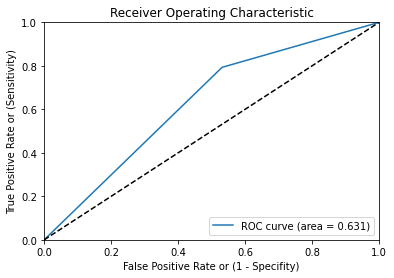

In [19]:
#Logistic Regression Score
cname= 'Logistic Regression'
fname= "RFE_" + str(3) + str(cname)+'_logreg'
precision_log,recall_log,roc_log,acu_log=predict_with_data(Xred,numres.loc[:,'1'],createLogisticRegression(),fname)
classifier_results(cname,precision_log,recall_log,roc_log,acu_log)

print('Logistic Regression')
print('---------') 
print('Precision: ', precision_log) 
print('Recall: ', recall_log) 
print('ROC AUC Score: ', roc_log) 
print ('Accuracy: ', acu_log) 
print('---------')

SVC
---------
Precision:  0.7846153846153846
Recall:  0.8793103448275862
ROC AUC Score:  0.7209051724137931
Accuracy:  0.7666666666666667
---------


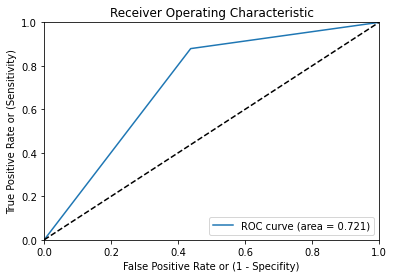

In [20]:
#SVC Score
cname= 'Support Vector Classifier'
#fname= "RFE_" + str(k) + str(cname)+'_svc'
precision_svc,recall_svc,roc_svc,acu_svc=predict_with_data(Xred,numres.loc[:,'1'],createSVC(),fname)
classifier_results(cname,precision_log,recall_log,roc_log,acu_log)

print('SVC')
print('---------') 
print('Precision: ', precision_svc) 
print('Recall: ', recall_svc) 
print('ROC AUC Score: ', roc_svc) 
print ('Accuracy: ', acu_svc) 
print('---------')

RandomForest
---------
Precision:  0.7692307692307693
Recall:  0.8620689655172413
ROC AUC Score:  0.6966594827586207
Accuracy:  0.7444444444444445
---------


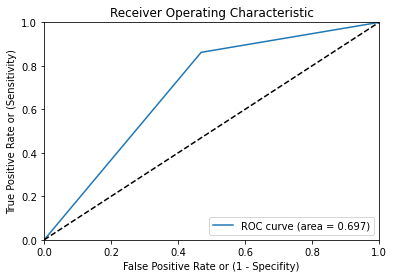

In [21]:
#Random Forest Classifier Score
cname= 'Random Forest'
#fname= "RFE_" + str(k) + str(cname)+'_rf'
precision_rf,recall_rf,roc_rf,acu_rf=predict_with_data(Xred,numres.loc[:,'1'],
                                                       createRandomForestClassifier(),fname)
classifier_results(cname,precision_log,recall_log,roc_log,acu_log)


print('RandomForest')
print('---------') 
print('Precision: ', precision_rf) 
print('Recall: ', recall_rf) 
print('ROC AUC Score: ', roc_rf) 
print ('Accuracy: ', acu_rf) 
print('---------')